**Time Series model**

In [ ]:
# I will implement ARIMA and SARIMA also

In [80]:
# import libraries
import warnings
warnings.filterwarnings('ignore')

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [62]:
import itertools
from sklearn.metrics import *
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

In [4]:
df = pd.read_csv('AirPassengers.csv')

In [5]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df.shape

(144, 2)

In [16]:
df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [18]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [19]:
#setting Month column as a index
df = df.set_index('Month')

In [20]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [21]:
plt.style.use('dark_background')

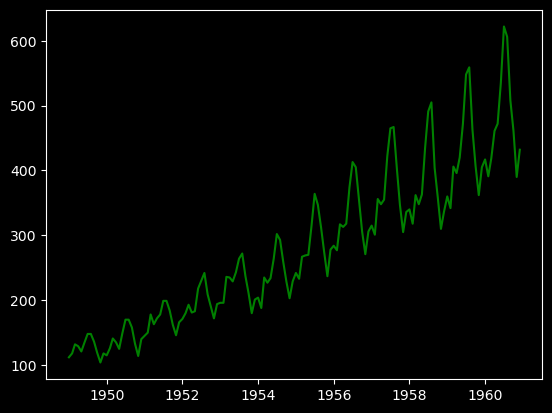

In [24]:
plt.plot(df, color = 'g')
plt.show()

In [25]:
# The data shows upward trend and seasonality,so there is a chance that the data might a 
#non-stationary data

In [26]:
#Checking data is stationary or non_stationary
#ADFuller - Augmented Dickey Fuller Test

In [27]:
# results = adfuller(df)

In [28]:
# results #the second value is p-value

(0.8153688792060482,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [30]:
print(f'P-value is: {results[1]}')

if results[1] > 0.05:
    print('Data is non stationary')
else:
    print('Data is stationary')

P-value is: 0.991880243437641
Data is non stationary


In [41]:
#creating a function to check graph
def check_graph(data):
        
    #rolling mean
    rolling_mean = data.rolling(window = 12).mean()
    #rolling standard deviation
    rolling_std = data.rolling(window = 12 ).std()

    #plotting graph
    original_data = plt.plot(data, color = 'r', label= 'Original data')
    rolling_mean_data = plt.plot(rolling_mean,color = 'y', label= 'Rolling mean')
    rolling_std_data = plt.plot(rolling_std,color = 'b', label= 'Rolling mean')
    plt.legend()
    plt.title('Rolling Statistics')
    plt.show()

    results = adfuller(data)
    print(f'P-value is: {results[1]}')

    if results[1] > 0.05:
        print('Data is non stationary')
    else:
        print('Data is stationary')



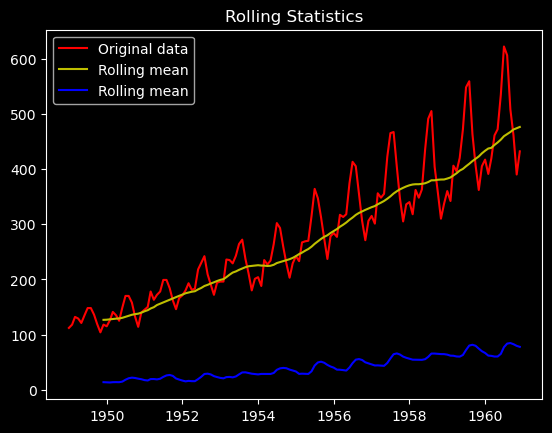

P-value is: 0.991880243437641
Data is non stationary


In [42]:
#
check_graph(df)

In [31]:
# So,the data is a non stationary data, though we need change this to stationary

* Transformation - Ensure that the variance of the data remain constant over time

In [32]:
# Log transformation

In [38]:
df_log = np.log(df)

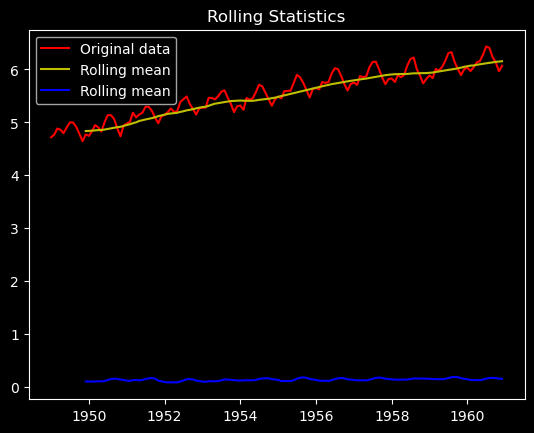

P-value is: 0.42236677477039125
Data is non stationary


In [43]:
# now we will check the graph weather transformationn is done

check_graph(df_log)

**Differencing**

In [44]:
# To stabilize the mean

In [45]:
df_log_diff1 = df_log.diff().dropna()

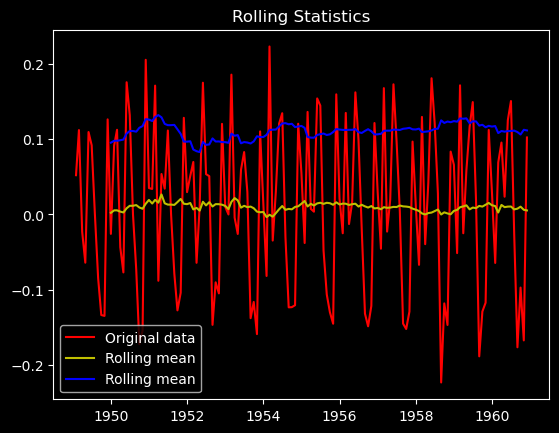

P-value is: 0.07112054815085875
Data is non stationary


In [46]:
# now we will check the graph again

check_graph(df_log_diff1)

In [47]:
# Thus the p-value became less, p-value is very close to 0.05,
#so, we need to difference again to archieve the value and make data stationary

In [48]:
df_log_diff2 = df_log_diff1.diff().dropna()

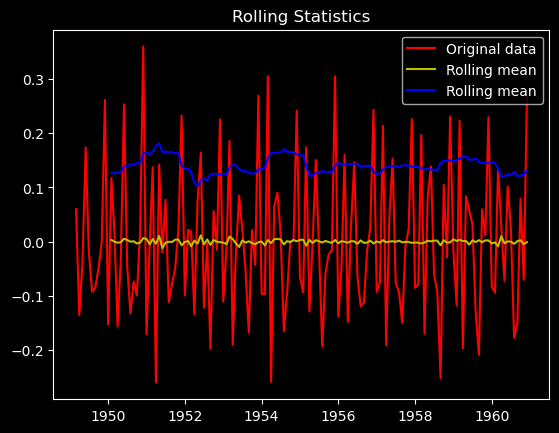

P-value is: 7.419304549376505e-13
Data is stationary


In [49]:
# 2nd time differenciate done, checking the graph again

check_graph(df_log_diff2)

In [50]:
#now the p_value is very samall that is less than 0.05 and the data is now stationary

Though the 2nd order diff made data stationary, we will use 1st order difference beacause in the 2nd order diff, the std is flactuating more, and also the p-value is very very less. 1st order is very close to p-value.

In [51]:
##Order of time series
# ACF(Auto co relation function), PACF(Partial auto co-relation function)

# it will help to analyze the co-relation of data in time series

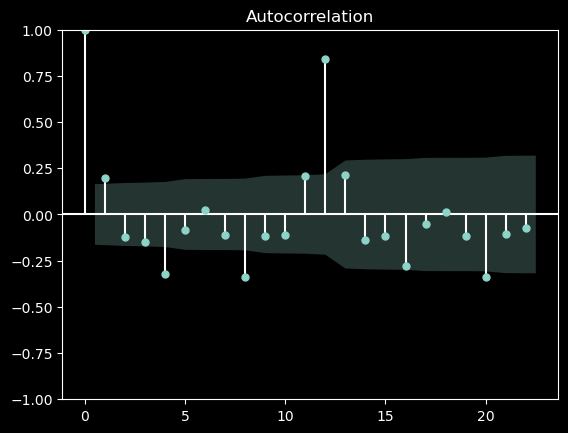

In [54]:
#ACF

plot_acf(df_log_diff1)
plt.show()

***ACF= 4***

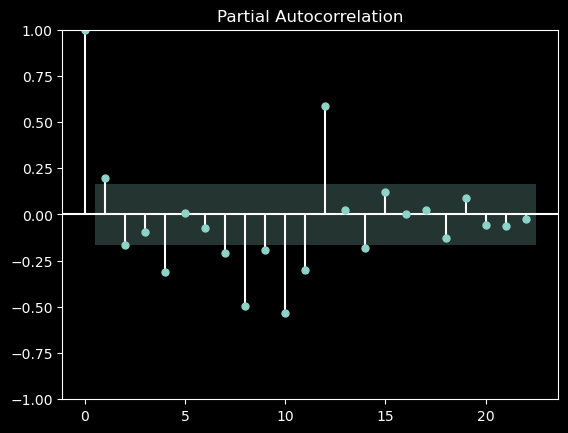

In [55]:
#PACF

plot_pacf(df_log_diff1)
plt.show()

**PACF = 4**

In [56]:
# Assumped order = 4,0,4 (p,d,q)

**Model Building**

In [69]:
#ARIMA

model = ARIMA(df_log_diff1, order = (4,0,4))
result = model.fit()

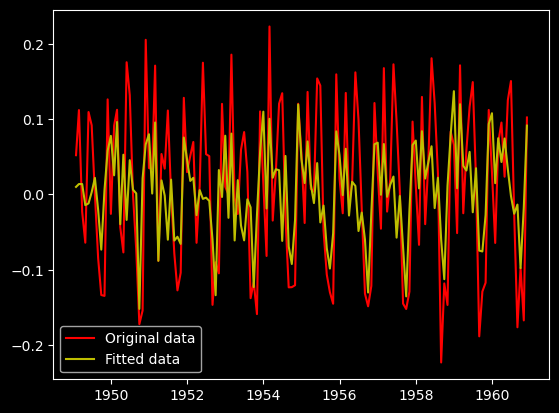

In [72]:
plt.plot(df_log_diff1, label = 'Original data', color = 'r')
plt.plot(result.fittedvalues, label = 'Fitted data', color= 'y')
plt.legend()
plt.show()

In [64]:
# AutoARIMA

#You do not need to understand the graph, autoarima will help you to understand the 
#(p,d,q) value, will find the best combination

In [67]:
auto_model = auto_arima(df_log_diff1,test = 'adf',
                  start_p =0,
                  start_q = 0,
                  D= 0,
                  max_p = 12,
                  max_q = 12,
                  seasonal = True,
                  suppress_warnigs = True,
                  error_action = 'ignore',
                  stepwise = True, trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-231.565, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-235.386, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-237.507, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-232.439, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-241.608, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-268.893, Time=0.29 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-237.605, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-269.576, Time=0.41 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-236.952, Time=0.12 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-248.753, Time=0.22 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-269.822, Time=0.42 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-262.544, Time=0.37 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-275.362, Time=0.46 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-274.755, Time=0.56 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept

In [68]:
# model using order = (4,0,3)

model1 = ARIMA(df_log_diff1, order = (4,0,3))
result1 = model1.fit()

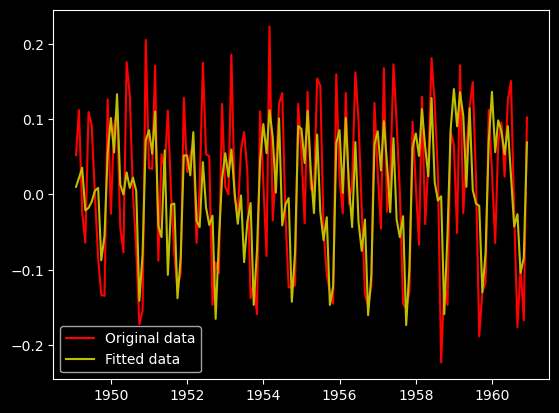

In [71]:
plt.plot(df_log_diff1, label = 'Original data', color = 'r')
plt.plot(result1.fittedvalues, label = 'Fitted data', color= 'y')
plt.legend()
plt.show()

In [73]:
#Though the data is a seasonal data, so we have to implement SARIMA model for better predictions

**SARIMA**

In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [77]:
model2 = SARIMAX(df_log_diff1, order = (4,0,3), seasonal_order =(4,0,3,12))
result2 = model2.fit()

In [78]:
#Forecast

forecast = result2.forecast(steps = 60)

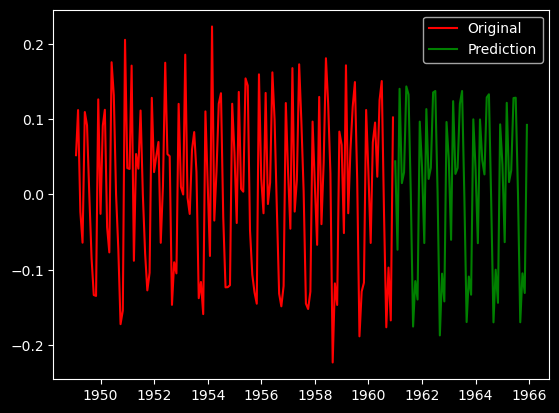

In [79]:
plt.plot(df_log_diff1, color = 'r', label = 'Original')
plt.plot(forecast, color = 'g', label = 'Prediction')
plt.legend()
plt.show()